Text(0.5, 1.0, 'Humidity and Temperature Summary w/ Diffusion & Power Consumption')

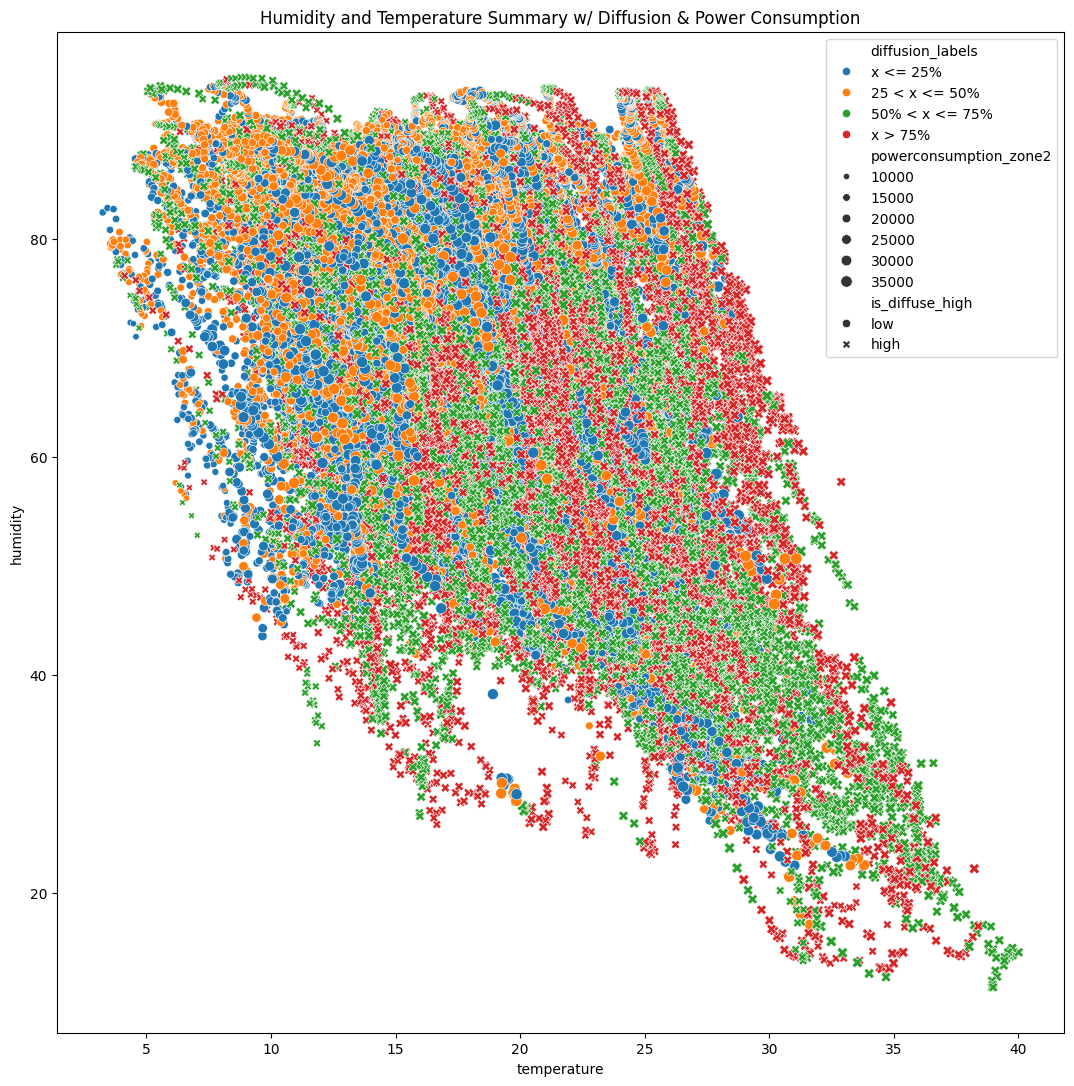

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


data = pd.read_csv("powerconsumption.csv")
data.columns = data.columns.str.lower().str.strip()
data.index = pd.to_datetime(data['datetime'])
# deal with powerconsumption_zone2 (drop datetime、powerconsumption_zone1、powerconsumption_zone3 column)
data = data.drop(['datetime', 'powerconsumption_zone1', 'powerconsumption_zone3'], axis=1)
# data.head()

# plt.figure(figsize=(7,7))
# sns.scatterplot(data = data, x='temperature', y='humidity')
# plt.title('Humidity and Temperature Relationship')
# plt.grid(True)

data['is_diffuse_high'] = data['diffuseflows'].apply(lambda x: 'high' if x > data['diffuseflows'].median() else 'low')
data['is_diffuse_high'].unique().tolist()
# sns.scatterplot(data = data, x='temperature', y='humidity', hue='is_diffuse_high')
# plt.figure(figsize=(10,10))
# sns.scatterplot(data = data, x='temperature', y='humidity', size='powerconsumption_zone2', hue='is_diffuse_high')
def diffusion(x):
    if x <= data.diffuseflows.quantile(0.25):
        return 'x <= 25%'
    elif data.diffuseflows.quantile(0.25) < x <= data.diffuseflows.quantile(0.5):
        return '25 < x <= 50%'
    elif data.diffuseflows.quantile(0.5) < x <= data.diffuseflows.quantile(0.75):
        return '50% < x <= 75%'
    else:
        return 'x > 75%'
data['diffusion_labels'] = data.diffuseflows.apply(lambda x: diffusion(x))
# data.head()
plt.figure(figsize=(13,13))
sns.scatterplot(data=data, x='temperature', y='humidity', size='powerconsumption_zone2', hue='diffusion_labels', style='is_diffuse_high')
plt.title('Humidity and Temperature Summary w/ Diffusion & Power Consumption')

px.scatter(data, x='temperature', y='humidity', size='powerconsumption_zone2', color='diffusion_labels', symbol='is_diffuse_high')


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


data = pd.read_csv("powerconsumption.csv")
data.columns = data.columns.str.lower().str.strip()
data.index = pd.to_datetime(data['datetime'])
# deal with powerconsumption_zone2 (drop datetime、powerconsumption_zone1、powerconsumption_zone3 column)
data = data.drop(['datetime', 'powerconsumption_zone1', 'powerconsumption_zone3'], axis=1)
# data.info()
data.head()
# data.describe()

# define diffuse low & high (upper median is high; otherwise, lower than median is low) 
data['is_diffuse_high'] = data['diffuseflows'].apply(lambda x: 'high' if x > data['diffuseflows'].median() else 'low')
data['is_diffuse_high'].unique().tolist()
sns.scatterplot(data = data, x='temperature', y='humidity', hue='is_diffuse_high')
plt.title('Humidity and Temperature Relationship w/ Diffuse_high')
plt.figure(figsize=(10,10))
# combine temperaure、humidity、diffuse_high、power consumption into the figure
sns.scatterplot(data = data, x='temperature', y='humidity', size='powerconsumption_zone2', hue='is_diffuse_high')
plt.title('Humidity and Temperature Relationship w/ Diffuse_high & Power Consumption')

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,powerconsumption_zone2
datetime,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,16128.87538
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,19375.07599
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,19006.68693
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,18361.09422
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,17872.34043


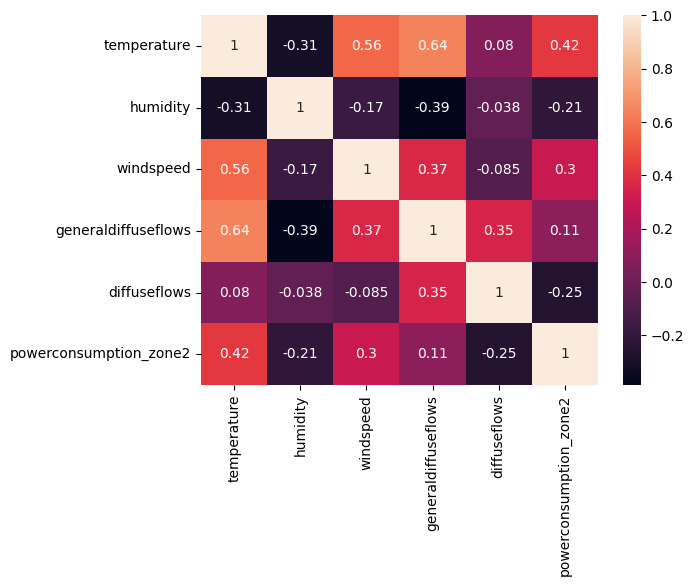

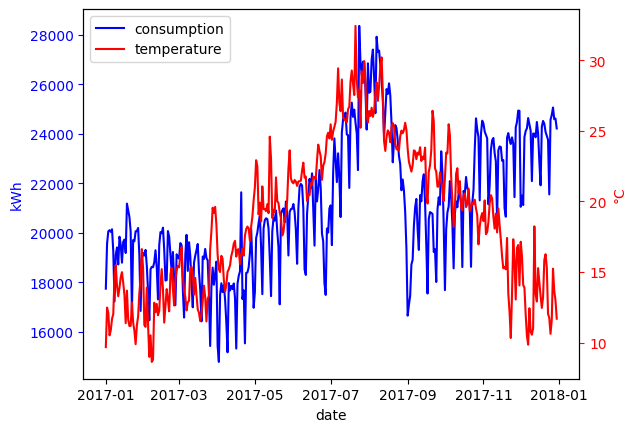

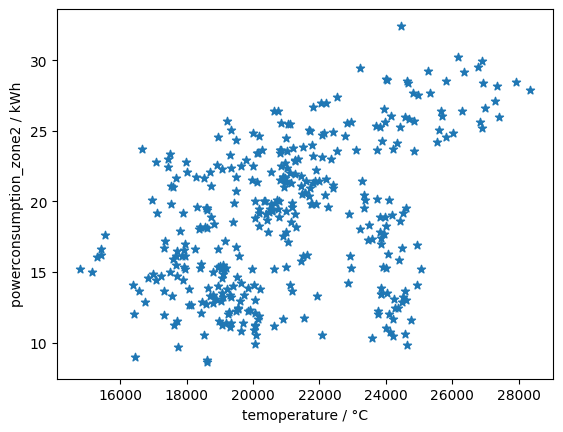

Learned function: power_consumption = temperature*220.41 + 16896.64
R^2 score: 0.17914777151851513


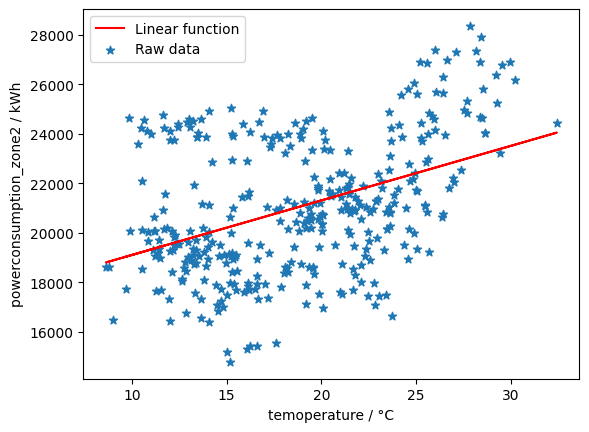

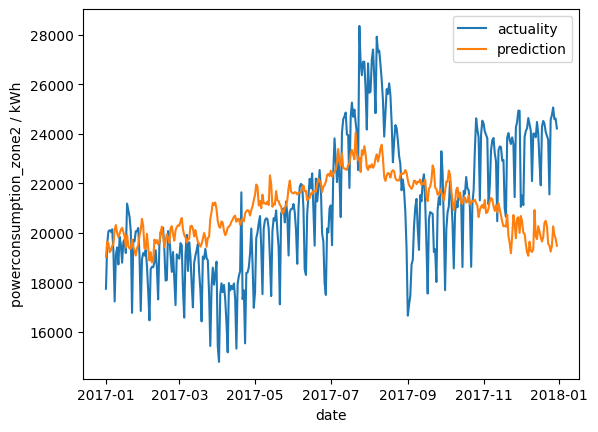

learned function: power_consumption = 26861.28 * (temperature**0) + -899.67 * (temperature**1) + 29.16 * (temperature**2)
R^2 score: 0.26883141005067945


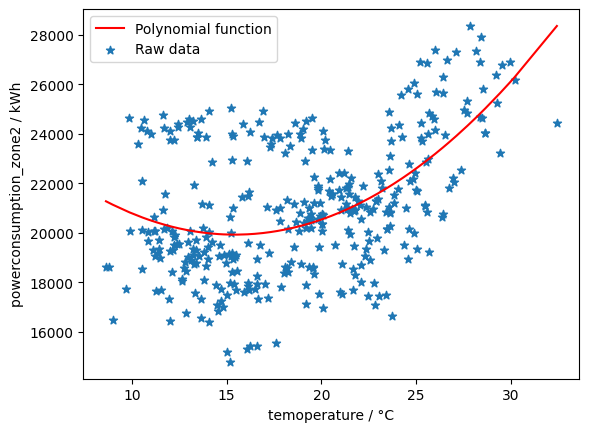

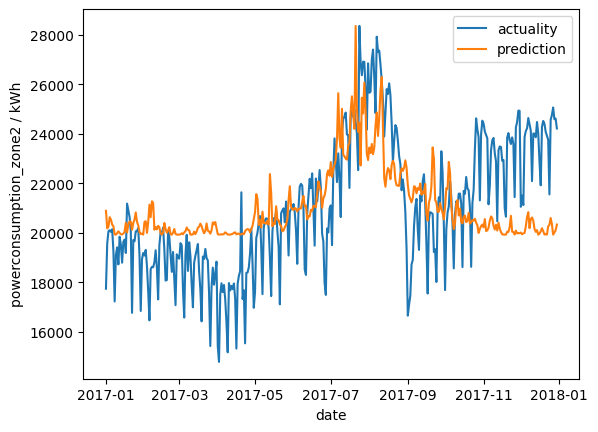

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


data = pd.read_csv("powerconsumption.csv")
data.columns = data.columns.str.lower().str.strip()
data.index = pd.to_datetime(data['datetime'])
# deal with powerconsumption_zone2 (drop datetime、powerconsumption_zone1、powerconsumption_zone3 column)
data = data.drop(['datetime', 'powerconsumption_zone1', 'powerconsumption_zone3'], axis=1)
data.head()
daily_data = data.resample('24h').mean()
daily_data.head()
sns.heatmap(daily_data.corr(), annot=True)
# strong correlation between temperature and consumption

fig, ax1 = plt.subplots()
ax1.plot(daily_data.index, daily_data['powerconsumption_zone2'], 'blue', label='consumption')
ax1.set_xlabel('date')
ax1.set_ylabel('kWh', color='blue')
ax1.tick_params('y', colors='blue')
ax2 = ax1.twinx()
ax2.plot(daily_data.index, daily_data['temperature'], 'red', label='temperature')
ax2.set_ylabel('°C', color='red')
ax2.tick_params('y', colors='red')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')
plt.show()

# scatter figure and using linear regression to predict power consumption
plt.scatter(daily_data['powerconsumption_zone2'], daily_data['temperature'], marker='*')
plt.xlabel('temoperature / °C')
plt.ylabel('powerconsumption_zone2 / kWh')
plt.show()
X = np.expand_dims(np.array(daily_data['temperature']), axis=1)
y = np.array(daily_data['powerconsumption_zone2'])
reg = LinearRegression().fit(X, y)
print(f'Learned function: power_consumption = temperature*{reg.coef_[0]:.2f} + {reg.intercept_:.2f}')
print(f'R^2 score: {reg.score(X,y)}')
f = lambda x: x*reg.coef_[0] + reg.intercept_
plt.plot(daily_data['temperature'], daily_data['temperature'].apply(f), color='red', label='Linear function')
plt.scatter(daily_data['temperature'], daily_data['powerconsumption_zone2'], marker='*', label='Raw data')
plt.xlabel('temoperature / °C')
plt.ylabel('powerconsumption_zone2 / kWh')
plt.legend()
plt.show()

plt.plot(daily_data.index, daily_data['powerconsumption_zone2'], label='actuality')
plt.plot(daily_data.index, daily_data['temperature'].apply(f), label='prediction')
plt.xlabel('date')
plt.ylabel('powerconsumption_zone2 / kWh')
plt.legend()
plt.show()

# linear regression doesn't fit the raw data, so tring using polynomial regression to predict
def poly_reg(x, y, deg):
    # x is 2D array input data
    # y is 1D array target data
    # deg is polynomial degree
    coefficient = np.polyfit(x.reshape(-1), y, deg=deg)[::-1]
    print('learned function: power_consumption =', ' + '.join([f'{coefficient[i]:.2f} * (temperature**{i})' for i in range(len(coefficient))]))
    function = lambda x: sum([coefficient[i] * (x**i) for i in range(len(coefficient))])
    return np.vectorize(function)

poly = poly_reg(X, y, 2)
print(f'R^2 score: {r2_score(y, poly(X))}')

plt.plot(daily_data['temperature'].sort_values(), daily_data['temperature'].sort_values().apply(poly), color='red', label='Polynomial function')
plt.scatter(daily_data['temperature'], daily_data['powerconsumption_zone2'], marker='*', label='Raw data')
plt.xlabel('temoperature / °C')
plt.ylabel('powerconsumption_zone2 / kWh')
plt.legend()
plt.show()

plt.plot(daily_data.index, daily_data['powerconsumption_zone2'], label='actuality')
plt.plot(daily_data.index, daily_data['temperature'].apply(poly), label='prediction')
plt.xlabel('date')
plt.ylabel('powerconsumption_zone2 / kWh')
plt.legend()
plt.show()
